In [34]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv(r'C:\Users\dimri\OneDrive\Desktop\vs code java\myfirstvscode\regression task\robosheet1.csv')

In [36]:
df

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754
...,...,...,...,...,...,...
495,0,1,6,1.0,5881,636
496,0,1,2,1.0,1171,640
497,0,1,2,1.0,1171,640
498,0,1,2,1.0,1086,640


In [37]:
df.isnull().sum()

AGE       0
FEMALE    0
LOS       0
RACE      1
TOTCHG    0
APRDRG    0
dtype: int64

race has one missing value lets remove that entire row

In [38]:
df.dropna(axis=0, inplace=True)

In [39]:
df

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754
...,...,...,...,...,...,...
495,0,1,6,1.0,5881,636
496,0,1,2,1.0,1171,640
497,0,1,2,1.0,1171,640
498,0,1,2,1.0,1086,640


In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [41]:
X = df[['AGE', 'LOS', 'FEMALE', 'APRDRG', 'RACE']].values  # Select relevant features and convert to NumPy array
Y = df['TOTCHG'].values  # Target variable

In [42]:
print(X.shape)
print(Y.shape)

(499, 5)
(499,)


In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [44]:
model = DecisionTreeRegressor(random_state = 44)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)


# regressor = DecisionTreeRegressor(random_state=0)
# regressor.fit(X_train, Y_train)

In [45]:
print(predictions)

[ 1378.15151515 13112.          2051.47619048  2051.47619048
  2051.47619048  2051.47619048  2051.47619048  5916.
   695.          1340.5         1206.3125     13112.
  1206.3125      2708.66666667  1378.15151515  1378.15151515
  2051.47619048  1178.          1293.          1378.15151515
  2051.47619048  1378.15151515  1942.35        4412.
  2708.66666667  1378.15151515  2847.           899.85714286
  5916.          3674.          2051.47619048  1942.35
  2238.          6329.          6425.          1378.15151515
  1942.35        1378.15151515  1340.5         1378.15151515
   783.          9129.          3578.          1647.
  2217.          2401.           882.          2708.66666667
  1206.3125      1206.3125      1378.15151515  1206.3125
  1378.15151515  1378.15151515  1699.          1206.3125
  1378.15151515  6912.           899.85714286   762.
  1378.15151515  1033.          1378.15151515  1378.15151515
  1942.35        1378.15151515  2051.47619048   882.
  1942.35        1942.35 

In [49]:
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(Y_test,predictions))
mse

#we can figure out the mse to know the effeciency of our model. lower the mse the better our model 

3842.3096683617705

[Text(0.679612929021121, 0.9736842105263158, 'LOS <= 8.5\nsquared_error = 10808231.22\nsamples = 349\nvalue = 2682.564'),
 Text(0.39009507006498784, 0.9210526315789473, 'APRDRG <= 383.5\nsquared_error = 5317492.241\nsamples = 339\nvalue = 2333.917'),
 Text(0.05381803411860276, 0.868421052631579, 'APRDRG <= 49.5\nsquared_error = 18066777.72\nsamples = 34\nvalue = 6499.529'),
 Text(0.022745735174654752, 0.8157894736842105, 'APRDRG <= 36.0\nsquared_error = 9063110.25\nsamples = 2\nvalue = 17184.5'),
 Text(0.016246953696181964, 0.7631578947368421, 'squared_error = 0.0\nsamples = 1\nvalue = 14174.0'),
 Text(0.02924451665312754, 0.7631578947368421, 'squared_error = 0.0\nsamples = 1\nvalue = 20195.0'),
 Text(0.08489033306255077, 0.8157894736842105, 'AGE <= 1.5\nsquared_error = 11047998.577\nsamples = 32\nvalue = 5831.719'),
 Text(0.04224207961007311, 0.7631578947368421, 'APRDRG <= 55.5\nsquared_error = 3926329.472\nsamples = 12\nvalue = 3127.167'),
 Text(0.03574329813160033, 0.710526315789473

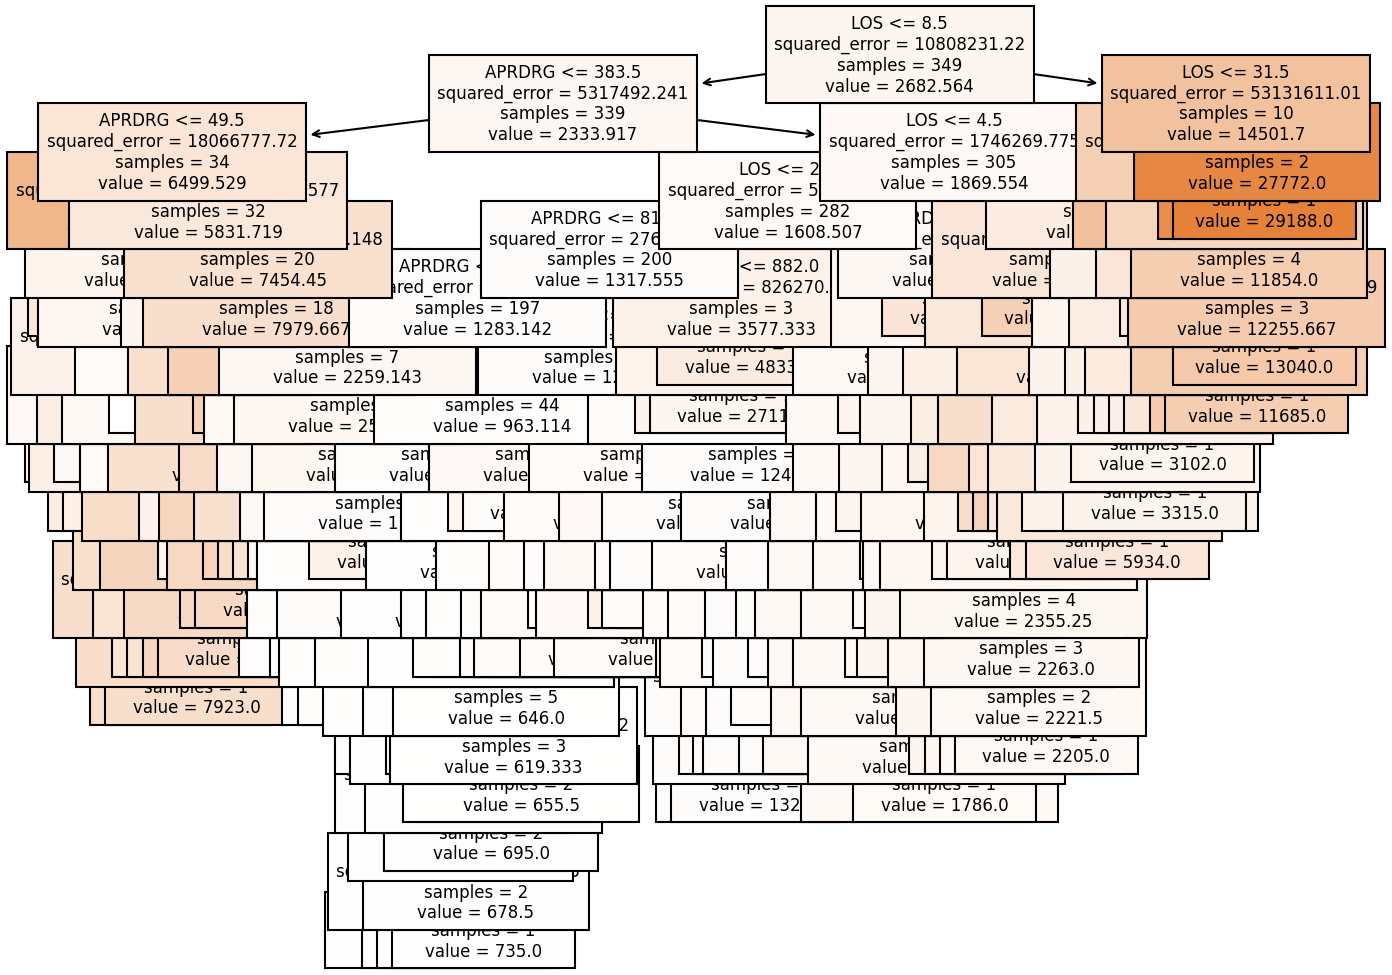

In [52]:
from sklearn.tree import plot_tree
plt.figure(figsize = (10,8), dpi = 150)
plot_tree(model, feature_names=['AGE','LOS','FEMALE','APRDRG','RACE'],filled = True, fontsize = 8)